# (실습) 분류문제 모델링 방법론 실습

## 실습 개요

1) 실습 목적

분류 문제 모델링에 대한 이해도를 높이기 위해, 로지스틱 회귀와 서포트 벡터머신 등 분류 문제의 세부
방법론들을 실습용 데이터에 직접 적용해봅니다.


2) 수강 목표
  - 로지스틱 회귀모델의 동작원리를 이해한다.
  - 결정트리를 활용한 분류모델을 학습하고, 그 결과를 시각화해 해석할 수 있다.
  - 서포트벡터머신을 활용한 분류모델을 학습할 수 있고, 선형분리가능성의 개념을 이해한다.
  

### 목차

* 1. 실습 데이터셋 준비
  * 1-1. 데이터셋을 불러와 기본정보 확인
  * 1-2. 데이터셋의 시각화 및 특성 파악

* 2. 로지스틱 회귀(Logistic Regression)
  * 2-1. 로지스틱 회귀모델을 통한 이진분류
  * 2-2. 한계값 조정을 통한 결과 컨트롤

* 3. 결정트리(Decision Tree)
  * 3-1. 결정트리(Decision Tree)와 불순도(Impurity)
  * 3-2. 결정트리의 시각화와 해석

* 4. 서포트 벡터 머신(SVM, Support Vector Machine)
  * 4-1. 사이킷런을 활용한 합성 데이터 생성
  * 4-2. blobs데이터를 활용한 SVM 분류모델의 학습
  * 4-3. 선형분리가능성(Linear separability)과 커널트릭(Kernel Trick)


### 환경 설정

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 관련 임포트
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer  # 로지스틱 회귀와 결정트리 실습에 사용할 데이터셋

# SVM 실습에 사용할 합성 데이터 생성 및 시각화 툴
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression

# 결정트리 모델과 시각화 관련 툴
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

# SVM 모델
from sklearn.svm import SVC  # SVM 분류기(classifier)
from sklearn.gaussian_process.kernels import RBF

### 실습 데이터셋

* 데이터셋: Breast cancer wisconsin (diagnostic) dataset

* 데이터셋 개요 :
  이 실습 데이터셋은 위스콘신 유방암 데이터셋으로, 총 569개의 샘플로
  구성되어 있습니다. 각 샘플을 구성하는 30개의 피쳐를 활용해 유방암이 악성(malignant)인지, 양성
  (benign)인지 여부를 분류하는 이진분류(Binary Classification)문제를 실습해보겠습니다.
* 데이터셋 저작권 : CC BY 4.0


## 1. 실습 데이터셋 준비
```
💡 목차 개요 : 실습에 사용할 Breast cancer 데이터셋을 불러와 살펴봅니다.
```

### 1-1 데이터셋을 불러와 기본정보 확인
> Scikit learn에서 제공하는 `load_breast_cancer()` 함수를 사용해 실습에 사용할 유방암 데이터셋을
불러온 뒤, 기본적인 정보를 확인해봅니다

#### 📝 설명 : 데이터의 "설명" 정보

사이킷런에서 제공하는 데이터셋은 총 8개 항목을 포함하는 dictionary 형태로 반환되는데, 이중
`DESCR`은 분석에 사용할 데이터는 아니지만, 데이터셋에 대한 유용한 정보를 제공하는 항목이므로 한번 출력해 확인해보겠습니다.

#### 👨‍💻 코드 : load_breast_cancer 데이터셋을 불러오고, 설명 섹션 확인

In [26]:
cancer = load_breast_cancer()

print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 


#### 📝 설명: 이진분류 문제

이진분류(Binary Classification)란 종속변수가 범주형 변수(Categorical Variable)로
주어지는 분류문제(Classification)의 일종으로, 결과가 1또는 0(True 또는 False) 두가지 범주중
하나로 결정되는 문제를 말합니다. 주어진 이메일이 스팸메일인지 아닌지 판단하거나, 이미지에 고양이가
있는지 아닌지를 결정하는 등 yes or no로만 대답이 결정되는 모든 문제가 이진분류에 해당합니다.

본 실습에 사용할 위스콘신 유방암 데이터 역시 환자의 종양이 악성(malignant)인지, 양성 (benign)인지
여부를 분류하는 문제이므로 이진분류 문제에 해당하며, 데이터의 목표값은 0또는 1로 주어집니다.


#### 👨‍💻 코드 : 유방암 데이터셋의 기본 정보 확인
- feature의 전체 수량과 종류 확인
- target의 전체 수량과 종류 확인
- target에서 각 범주별 빈도 확인

In [27]:
# 데이터셋의 입력값이 몇개의 샘플과 몇개의 변수로 구성되어있는지 확인
print(cancer["data"].shape)

# 데이터셋의 인풋값을 구성하는 feature들의 이름을 확인
print(cancer["feature_names"])

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
# 데이터셋의 target을 확인
print(cancer["target"].shape)
# target의 각 범주가 어떤 클래스에 해당하는지 확인
print(cancer["target_names"])

(569,)
['malignant' 'benign']


In [29]:
# 데이터셋의 target을 살펴봅시다.
cancer["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
# target내에 양성, 악성 샘플 수 확인
count_malignant, count_benign = np.bincount(cancer["target"])
print(f"총 {count_malignant}개의 악성 샘플과 {count_benign}개의 양성 샘플 포함.")

총 212개의 악성 샘플과 357개의 양성 샘플 포함.



### 1-2. 데이터 시각화 및 특성 파악
> 본격적인 분류문제 모델링을 진행하기 이전에, 간단한 분석과 시각화를 통해 데이터의 특성을 살펴봅니다.



#### 📝 설명: 클래스별 히스토그램을 통한 시각화

데이터셋에 포함되는 각 피쳐들의 값에 따라 악성(malignant)과 양성 (benign)샘플이 어떻게 분포하는지
히스토그램을 통해 확인해보도록 하겠습니다. 이를 통해 분류에 도움이 될 피쳐들과 그렇지 않은 피쳐들을
미리 판단해볼 수 있습니다.

#### 👨‍💻 코드 : 데이터셋을 클래스별로 분리한 후 히스토그램 시각화
- 각각 악성 또는 양성 중 한가지 샘플만 포함하도록 데이터셋을 둘로 분리
- 분리한 데이터셋을 활용해 한가지 변수에 대해 히스토그램 시각화
- 데이터셋 내의 모든 변수에 대해 같은 방식의 히스토그램 시각화 진행

In [31]:
# 이후 코드가 간단해지도록 alias 설정
data = cancer["data"]
target = cancer["target"]

# 데이터에서 악성, 양성에 해당하는 샘플만 선택해 새로운 변수로 저장
data_malignant = data[target == 0]
data_benign = data[target == 1]

# 데이터셋 분리의 결과 확인
print("malignant(악성) 샘플 : ", data_malignant.shape)
print("benign(양성) 샘플 : ", data_benign.shape)

malignant(악성) 샘플 :  (212, 30)
benign(양성) 샘플 :  (357, 30)


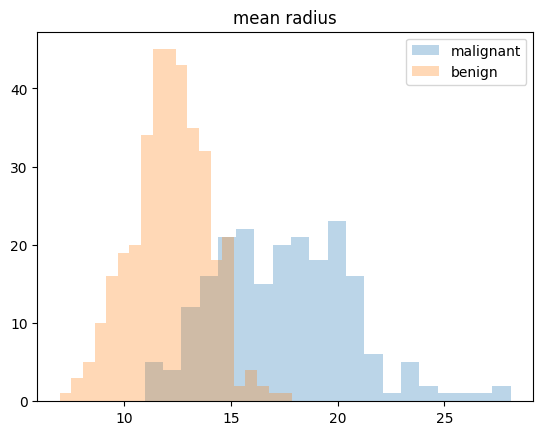

In [32]:
# 시각화에 사용할 변수의 인덱스를 지정
feature_idx = 0

# histogram의 형태로 악성, 양성 각각 샘플의 분포를 시각화.
plt.hist(data_malignant[:, feature_idx], bins=20, alpha=0.3)
plt.hist(data_benign[:, feature_idx], bins=20, alpha=0.3)

# 데이터셋의 피쳐, 클래스 이름 정보를 활용해 그래프에 정보를 추가
plt.title(cancer["feature_names"][feature_idx])
plt.legend(cancer["target_names"])

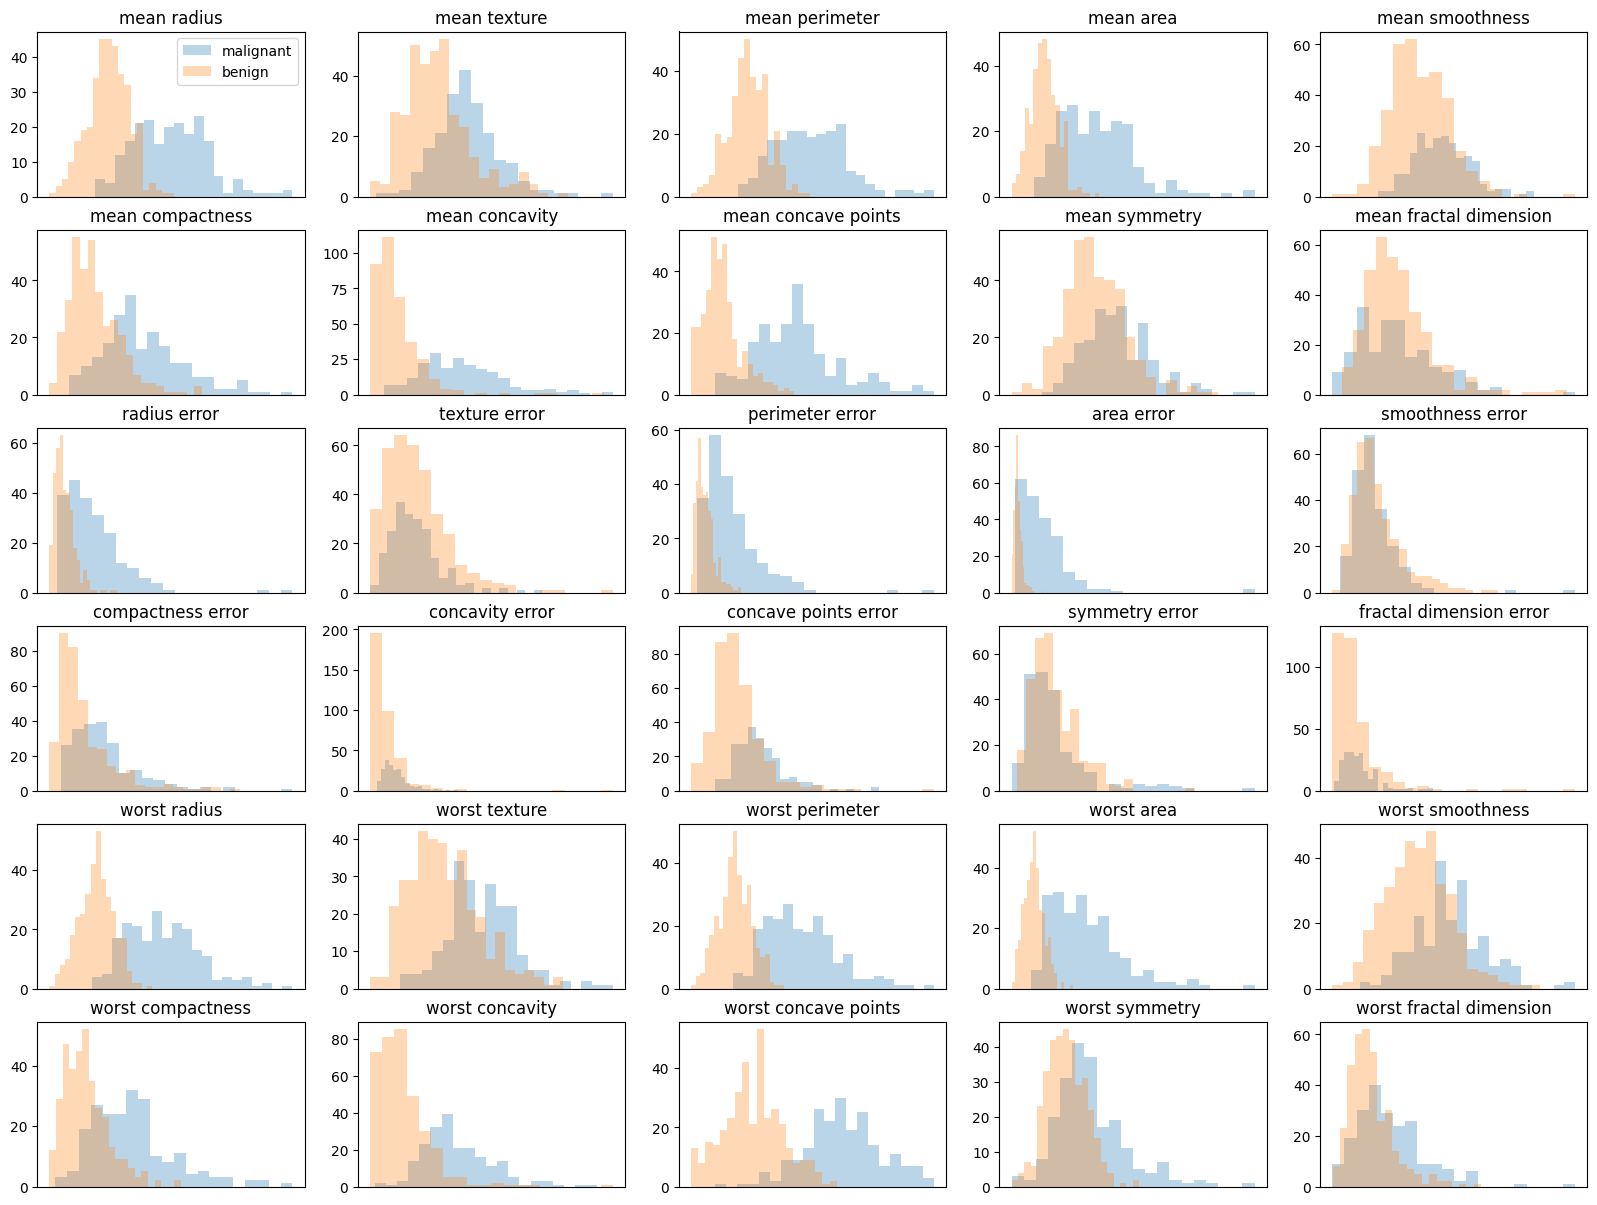

In [33]:
# 30개의 전체 변수 각각에 대해 같은 방식의 시각화를 진행
plt.figure(figsize=[20,15])
for feature_idx in range(30):
    plt.subplot(6, 5, feature_idx + 1)

    # histogram의 형태로 악성, 양성 각각 샘플의 분포를 시각화.
    plt.hist(data_malignant[:, feature_idx], bins=20, alpha=0.3)
    plt.hist(data_benign[:, feature_idx], bins=20, alpha=0.3)

    # 데이터셋의 피쳐, 클래스 이름 정보를 활용해 그래프에 정보를 추가
    plt.title(cancer["feature_names"][feature_idx])
    # 악성/양성에 대한 범례(legend)는 첫번째 histogram에만 표시
    if feature_idx == 0:
        plt.legend(cancer["target_names"])
    plt.xticks([])

## 2. 로지스틱 회귀를 통한 이진분류 모델링

```
💡 목차 개요 : 실습용 유방암 데이터에 로지스틱 회귀 방식의 이진분류 모델링을 적용해봅니다.
```



#### 📝 설명: 로지스틱 회귀

로지스틱 회귀는 이진분류 문제의 해결을 위한 방법론으로, 데이터가 **범주1(True)에 속할 확률**을 0에서
1사이 값으로 예측하고, 그 확률값이 정해진 한계값(Threshold)보다 큰지 작은지에 따라 해당 샘플이 둘중
어느 범주에 속하는지 분류해주는 지도 학습 알고리즘입니다.




#### 👨‍💻 코드 : 로지스틱 회귀모델 학습
- 데이터셋을 8:2로 랜덤 분할
- 모델을 초기화하고 학습 데이터셋을 fitting
- 평가 데이터셋에서 결과 스코어(정확도) 확인

In [34]:
# 결과 재현성을 위해 random seed를 설정합니다.
random_state = 1234

# 데이터셋을 8:2로 분할해 학습용 / 평가용으로 사용합니다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=random_state)

# 모델을 초기화하고 학습 데이터에서 최적화를 진행합니다.
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 테스트셋에 대한 결과 정확도를 계산합니다.
score = model.score(X_test, y_test)

print('scores =', score)

scores = 0.9473684210526315


### 2-2. 한계값 조정을 통한 로지스틱 회귀의 출력값 조절
> 로지스틱 회귀모델의 한계값(Threshold)을 조절해 모델의 출력값으로 나오는 악성/양성의 빈도를 조절해봅니다.

#### 📝 설명 : 결과값 조절의 필요성

실제 유방암 환자의 입장에서, 위 모델을 사용해 종양이 악성(암)인지 양성(혹)인지 판단하는 상황을
생각해봅시다. 다만, 악성/양성(malignant/benign)이라는 용어는 이후 설명할 개념들과 혼동을 일으킬 여지가 크므로 두 용어를
다음과 같이 양성/음성(positive/negative)으로 바꾸어 부르도록 하겠습니다.
- 결과 0, 악성(malignant): 암이 **있음** -> 양성(positive)
- 결과 1, 양성(benign): 암이 **아님** -> 음성(negative)

모델의 판단이 잘못되는 경우는 두가지가 있는데,
하나는 실제로는 암이 아닌데(negative), 암이라고 잘못 판단하는 경우, **False Positive**가
있습니다. 이 경우 환자는 불필요한 스트레스와 추가적인 검사를 받게 됩니다.

반면, 실제로는 암인데(positive) 암이 아니라고 잘못 판단하는 경우, **False Negative**도 있습니다. 이 경우 환자는 필요한 치료를 적절한 시기에 받지 못하게 되어 심각한 문제를 겪게 될 수 있습니다.

따라서, 이 두 에러중에는 False Negative가 훨씬 심각한 결과를 초래하며, 만약 모델이 False
Positive 에러를 조금 더 많이 내더라도 False Negative 에러를 줄일 수 있다면, 훨씬 더 실제 상황에
유용한 결과를 내는 모델이 될 수 있습니다.


#### 👨‍💻 코드 : 한계값 조절을 통한 False Negative줄이기
- 사이킷런 모델에서 예측 결과를 확률값으로 받아오기
- 한계값을 기본값인 0.5로 두면 동일한 결과가 나오는것 확인
- 한계값을 조절해 위음성 줄이기




In [35]:
# 학습된 모델에서 결과 확률값을 그대로 가져오기
probs = model.predict_proba(X_test)[:, 1]

# 기본값인 0.5를 기준으로 판단한 결과는 원래 모델의 예측 함수(predict)와 동일
print("원래 예측값: \n", model.predict(X_test))
prediction = (probs > 0.5).astype(int)
print(f"한계값 0.5로 판단한 예측값: \n", prediction)

# y_test == 0(양성)이지만 prediction == 1(음성)인 False Negative의 수를 계산해 출력
false_neg = ~y_test & prediction  # ~, &는 각각 bitwise "not", "and" 연산자
print(f"위음성(False Negative) 개수: {false_neg.sum()} 개")

# 한계값을 조절해 위음성 빈도를줄이기
threshold = 0.7

prediction = (probs > threshold).astype(int)
print(f"한계값 {threshold}로 판단한 예측값: \n", prediction)

false_neg = ~y_test & prediction
print(f"위음성(False Negative) 개수: {false_neg.sum()} 개")


원래 예측값: 
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
한계값 0.5로 판단한 예측값: 
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
위음성(False Negative) 개수: 6 개
한계값 0.7로 판단한 예측값: 
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
위음성(False Negative) 개수: 5 개


## 3. 결정트리(Decision Tree)를 통한 분류 모델링

```
💡 목차 개요 : 실습용 유방암 데이터에 결정트리 방식을 적용해 분류를 수행해봅니다.
```

### 3-1. 결정트리(Decision Tree)와 불순도(Impurity)
> 전처리가 완료된 유방암 데이터에 대해 의사결정트리(Dicision Tree)모델을 적용해봅니다.

#### 📝 설명: 결정트리(Decision Tree)와 불순도(Impurity)

결정 트리는 트리 구조를 사용하여 데이터를 분할하고 예측을 수행하는 머신러닝 모델입니다. 트리의 각
노드에서는 특정 기준에 따라 데이터를 이진분류하며, 입력 샘플이 여러 노드를 거쳐 최종적으로 리프 노드
(트리의 끝)에 도달하면, 최종적인 예측값이 결정됩니다.

이 모델에서는 "불순도"라는 개념을 사용하여 데이터를 분할하는 기준을 결정합니다.
불순도는 한 노드에 서로 다른 범주의 데이터가 얼마나 섞여 있는지를 나타내는 지표로,
불순도가 낮을수록 해당 노드의 데이터는 한 범주에 속하게 됩니다.
불순도를 측정하는 방법으로는 주로 지니 불순도(Gini impurity)나 엔트로피(Entropy)가 사용됩니다.

결정 트리 모델의 장점은 모델의 판단기준을 사람이 알아볼 수 있는 정도를 뜻하는, 해석력(interpretability)이 뛰어나다는 것인데, 트리 구조를 직접 확인해 데이터가 어떤 기준으로 분류되었는지 직관적으로 이해할 수 있기 때문입니다.
<center>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png'>
</center>

#### 📚 자료
  - [귀퉁이 서재, 머신러닝 - 4. 결정 트리(Decision Tree)](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree):
  위 이미지의 출처입니다. 결정트리 방법론에 대해 더 자세한 설명이 궁금하다면, 본 자료를 참고하세요.





### 3-2. 결정트리의 시각화와 해석
> 위스콘신 유방암 데이터를 활용해 학습한 결정트리 분류기를 시각화해 결과 모델을 해석해봅니다.


In [36]:
# 결정트리 학습
dec_tree = DecisionTreeClassifier(max_depth=10, random_state=1234)
dec_tree.fit(X_train, y_train)

# 결과 정확도 출력
print(f"학습 데이터셋 분류 정확도: {dec_tree.score(X_train, y_train):.3f}")
print(f"평가 데이터셋 분류 정확도: {dec_tree.score(X_test, y_test):.3f}")

학습 데이터셋 분류 정확도: 1.000
평가 데이터셋 분류 정확도: 0.904



#### 👨‍💻 코드 : graphviz를 이용한 결정 트리 시각화
- 사이킷런의 `export_graphviz`함수를 사용해 그래프를 파일로 저장
- graphviz 패키지를 활용해 저장한 파일을 시각화

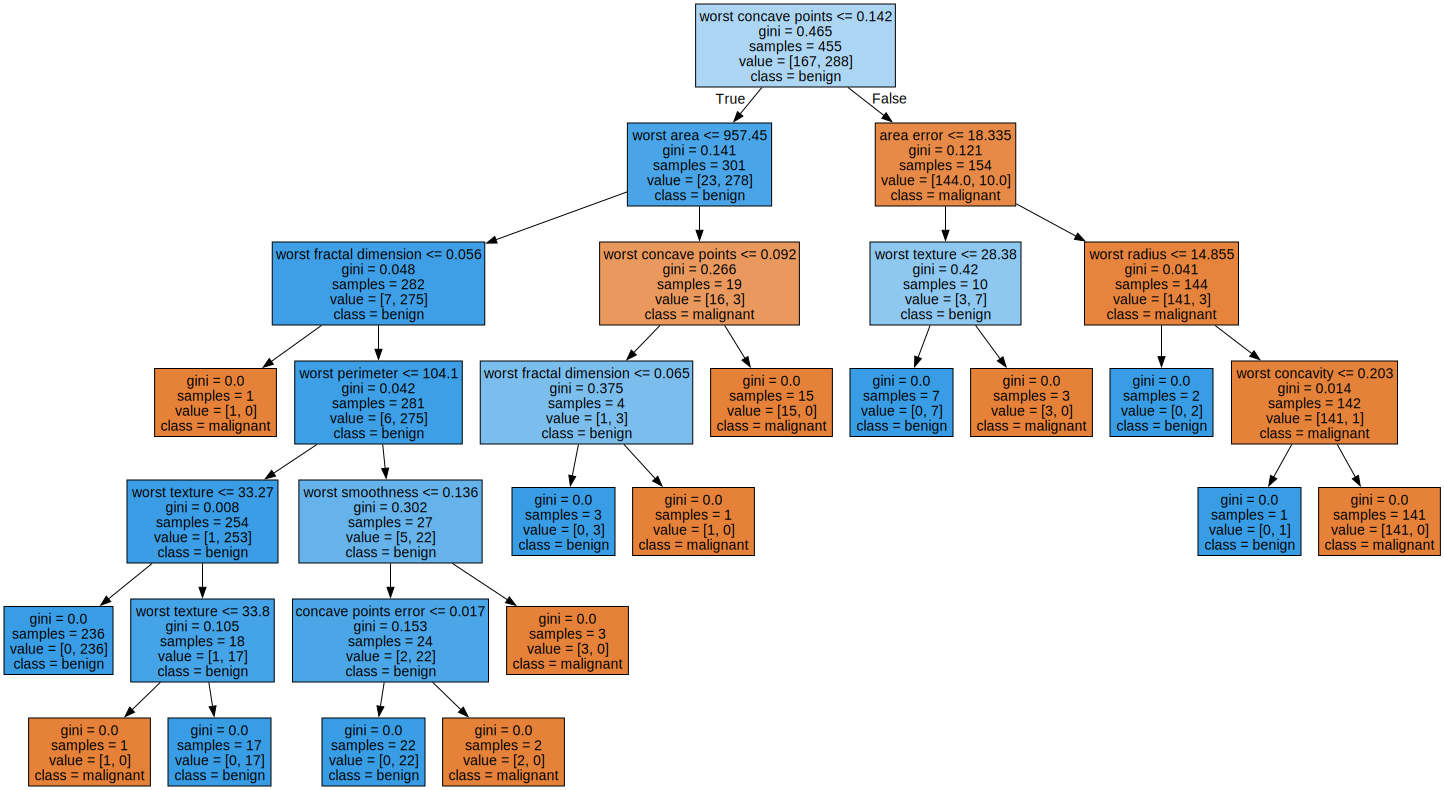

In [37]:
# "tree.dot"이라는 이름으로, 학습한 그래프 파일을 저장
export_graphviz(dec_tree, out_file="tree.dot", class_names=cancer["target_names"],
                feature_names=cancer["feature_names"], impurity=True, filled=True)

# 저장한 파일을 불러와 graphviz로 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


#### 📝 설명: Feature Importance
결정트리에서 각각의 변수가 예측 결과에 얼마나 중요한 역할을 했는지를 나타내는 지표로,
결정트리의 노드에서 해당 변수를 활용해 불순도를 얼마나 감소시켰는지를 나타냅니다.

랜덤으로 학습되는 개별 모델에 의존하는 값이므로, 이 값이 낮게 나타났다고 해서 그 변수가 전혀 중요치 않다는 결론을 내릴 수는 없습니다.


#### 👨‍💻 코드 : 결정트리 모델의 feature importance확인
- feature importance를 출력해 확인
- feature별 importance값을 bar graph형태로 시각화

In [38]:
print("Feature importances:")
print(dec_tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04080345 0.         0.         0.         0.01734378
 0.         0.         0.01839585 0.02928952 0.00758474 0.11248202
 0.02119796 0.         0.00939362 0.72738542 0.         0.01612362]


(-1.0, 30.0)

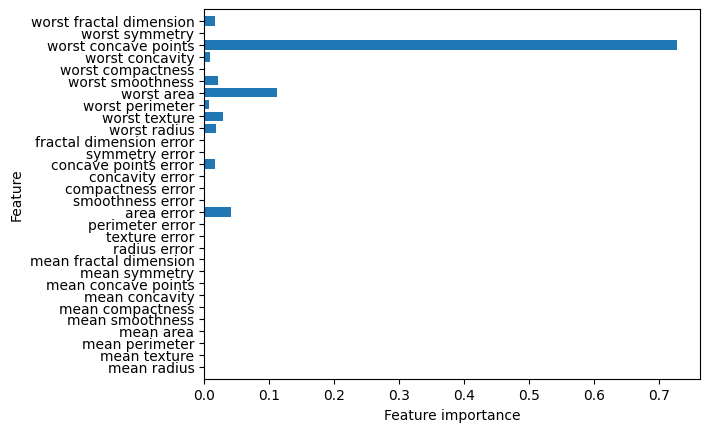

In [39]:
n_features = data.shape[1]
plt.barh(np.arange(n_features), dec_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer["feature_names"])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)


feature importance:  0.7273854248265089


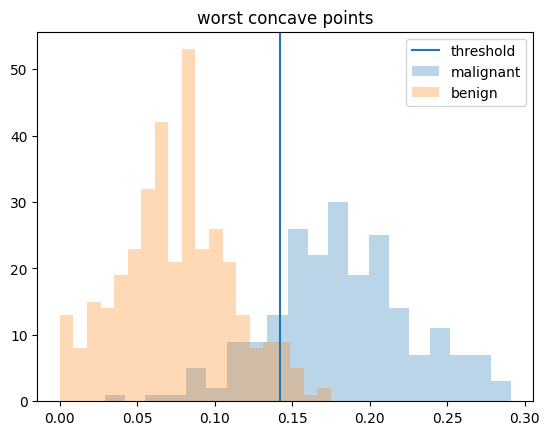

In [40]:
# 시각화를 수행할 변수를 지정합니다.
feature_name = "worst concave points"  # feature importance 높은 node
feature_threshold = 0.142
# feature_name = "worst fractal dimension"  # feature importance 낮은 node
# feature_threshold = 0.065

# 주어진 변수 이름을 통해 index를 찾고 feature importance값을 출력
list_feature_names = cancer["feature_names"].tolist()
feature_idx = list_feature_names.index(feature_name)  # builtin list의 index함수
print("feature importance: ", dec_tree.feature_importances_[feature_idx])

# histogram의 형태로 악성, 양성 각각 샘플의 분포를 시각화.
plt.hist(data_malignant[:, feature_idx], bins=20, alpha=0.3)
plt.hist(data_benign[:, feature_idx], bins=20, alpha=0.3)

# 데이터셋의 피쳐, 클래스 이름 정보를 활용해 그래프에 정보를 추가
plt.axvline(feature_threshold)
plt.title(cancer["feature_names"][feature_idx])
plt.legend(["threshold"] + list(cancer["target_names"]))
plt.show()

## 4. SVM(Support Vector Machine)를 통한 이진분류 모델링

```
💡 목차 개요 : SVM 모델을 활용한 이진분류 모델을 실습합니다.
```

### 4-1. 사이킷런을 활용한 합성 데이터 생성
> SVM 모델링을 진행할 합성데이터를 생성하고, 시각화를 통해 간단히 특성을 살펴봅니다.



#### 👨‍💻 코드 : 합성 데이터셋 생성
- `make_blobs` 함수를 사용해 랜덤 데이터 생성
- 생성된 데이터 시각화

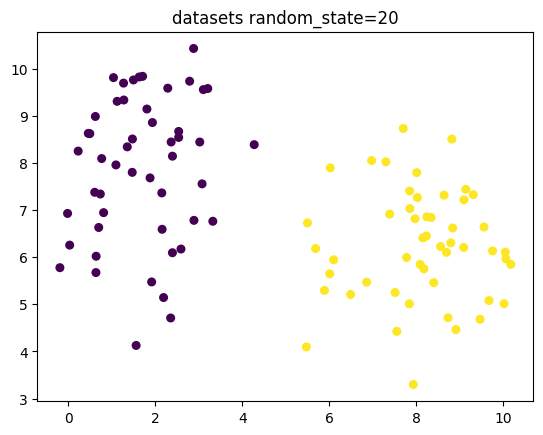

In [41]:
# 재현성을 위한 랜덤시드 고정
random_state = 20

# 합성데이터 생성
X, y = make_blobs(
    n_samples=100,  # 샘플의 수
    centers=2,  # 클러스터의 수. 이진분류 실습이므로 2로 설정
    cluster_std=1.2,  # 샘플의 표준편차
    random_state=random_state
)

plt.scatter(X[:,0], X[:,1], c=y, s=30)
plt.title('datasets random_state=20')
plt.show()


### 4-2. blobs데이터를 활용한 SVM 분류모델의 학습
> 생성한 데이터를 활용해 SVM모델을 학습하고, 결정경계와 서포트벡터를 시각화해봅니다.



#### 📝 설명: SVM(Support Vector Machine)

주어진 데이터를 두 개의 그룹으로 분리하는 방법으로, 데이터들과 거리가 가장 먼 초평면(hyperplane)을
**결정경계**로 선택해 경계의 양쪽을 별개의 클래스로 분류하는 방법론입니다. 주어진 각
클래스의 데이터셋들로부터 가장 멀리 떨어진 초평면을 결정경계로 선택하는 방식으로 학습됩니다.

- **NOTE:** 합성데이터를 사용해 결과를 시각화해보는 것이므로 데이터셋을 학습/평가용으로 구분하는 과정은 생략합니다.


#### 👨‍💻 코드 : SVM을 활용한 이진분류
- 결정경계 시각화를 위한 보조함수 정의
- 사이킷런의 SVM 분류기(Support Vector Classifier)를 학습한 후 분류 결과를 시각화

In [42]:
def make_xy_grid(xlim, ylim, n_points):
    #   1. x, y 각각이 일정 간격으로 변화하는 grid를 생성
    xx = np.linspace(*xlim, n_points)
    yy = np.linspace(*ylim, n_points)
    YY, XX = np.meshgrid(yy, xx)

    #   2. grid 위의 900개 점 좌표들을 순서대로 나타낸 array
    xy = np.stack([XX.reshape(-1), YY.reshape(-1)], axis=1)  # shape: (n^2, 2)
    return XX, YY, xy

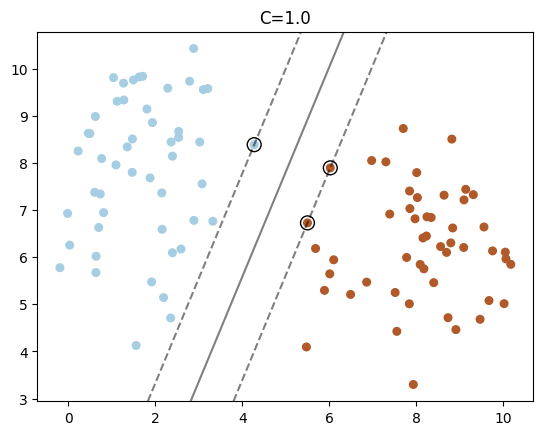

In [43]:
# 생성한 데이터로 SVM 분류기 모델 학습
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# 데이터셋 산점도 시각화
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# 시각화를 위해 x, y값 범위를 확인
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델의 결정 경계 시각화
XX, YY, xy = make_xy_grid(xlim, ylim, 30)
Z = clf.decision_function(xy).reshape(XX.shape)

# 위에서 생성한 결정경계와 마진 시각화
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# 서포트 벡터를 표시
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('C=1.0')
plt.show()

### 4-3. 선형분리가능성(Linear separability)과 커널트릭(Kernel Trick)
> 선형분리가 불가능한 데이터셋이 주어졌을 때, 커널트릭을 활용해 SVM분류기를 학습하는 방법을 실습합니다.


#### 📝 설명: 선형분리 불가능한 데이터셋과 커널 함수

SVM모델은 선형의 결정경계를 사용해 주어진 데이터셋을 분류하므로, 데이터셋이 선형분리 가능(Linearly
Separable)하지 않은 경우에는 사용이 불가합니다.

이런 경우에는 특별한 종류의 함수를 사용해 데이터를 선형분리 가능한 고차원 공간으로 맵핑해주면 SVM을 사용해 이진분류를 수행할 수 있는데,
이런 방식을 **커널 트릭(Kernel Trick)**이라고 부르며, 여기에 사용되는 함수를 **커널 함수(Kernel Function)**라고 부릅니다.

<center>
<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*zWzeMGyCc7KvGD9X8lwlnQ.png'>
</center>


여기에서는 RBF(Radial Basis Function)이라고하는 커널함수를 사용해 선형분리 불가능한 데이터셋에
대해 SVM 분류를 적용해보도록 하겠습니다.



#### 📚 자료
  - 이미지의 출처 : https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f


  - [SVM의 가우시안 RBF 커널 간략 정리](https://issuebombom.tistory.com/26):
  RBF 커널함수의 원리나 특성에 관해서는 강의 흐름상 중요하지 않은 부분이라 설명을 생략했습니다. 자세한 내용은 다음 자료를 참고하세요




#### 👨‍💻 코드 : 선형분리 불가능한 데이터셋 생성
- 사이킷런의 `make_circles`함수를 사용해 선형분리 불가한 데이터셋을 생성
- 생성한 데이터셋을 시각화

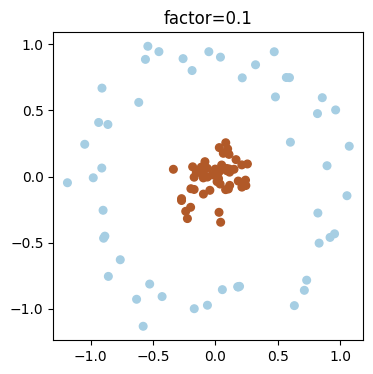

In [44]:
# 데이터 생성
X,y = make_circles(factor=0.1, noise=0.1) # factor: 생성할 원의 반지름 비율

# 생성한 데이터를 시각화
plt.figure(figsize=(4, 4))
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.title('factor=0.1')
plt.show()


#### 👨‍💻 코드 : 생성한 데이터에 커널함수를 적용하고 시각화
- 생성한 데이터셋의 인풋에 RBF 커널함수 적용
- 3D로 시각화

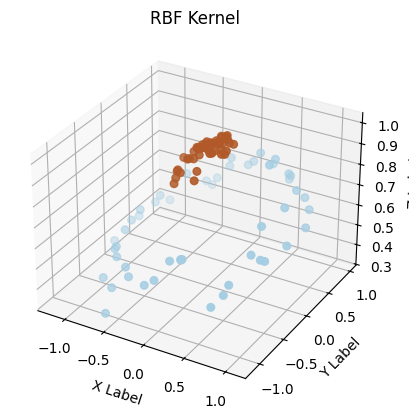

<Figure size 640x480 with 0 Axes>

In [45]:
# RBF 커널함수 적용
z = RBF(1.0).__call__(X)[0]

# 3D 공간에 커널함수 적용된 데이터셋을 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], z, c=y, s=30, cmap=plt.cm.Paired)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('RBF Kernel')
plt.show()
plt.clf()


#### 👨‍💻 코드 : 커널트릭을 적용한 SVM분류기 학습
- 사이킷런의 `SVC`함수에 내장된 커널함수 옵션을 활용해 데이터셋 분류
- 분류 결과 및 결정경계 시각화

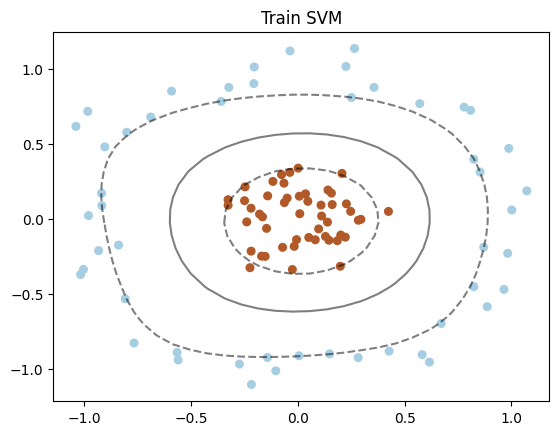

In [46]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 결정경계 시각화
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#데이터셋 호출.
X,y=make_circles(factor=0.2,noise=0.1) #factor = R2/R1, noise=std
# 커널트릭을 적용한 SVM분류기 학습
#kernel을 rbf(Radial Basis Function)을 이용하여 SVC를 작동시켜보자.
clf = SVC(kernel="rbf").fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.title('Train SVM')
plt.show()